In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
# Read the CSV file
df = pd.read_csv('Small LCL Data\LCL-June2015v2_0.csv')



#rename the columns
df.columns = ['LCLid', 'stdorToU', 'DateTime', 'KWH']

df.head()
print(df.columns)

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH'], dtype='object')


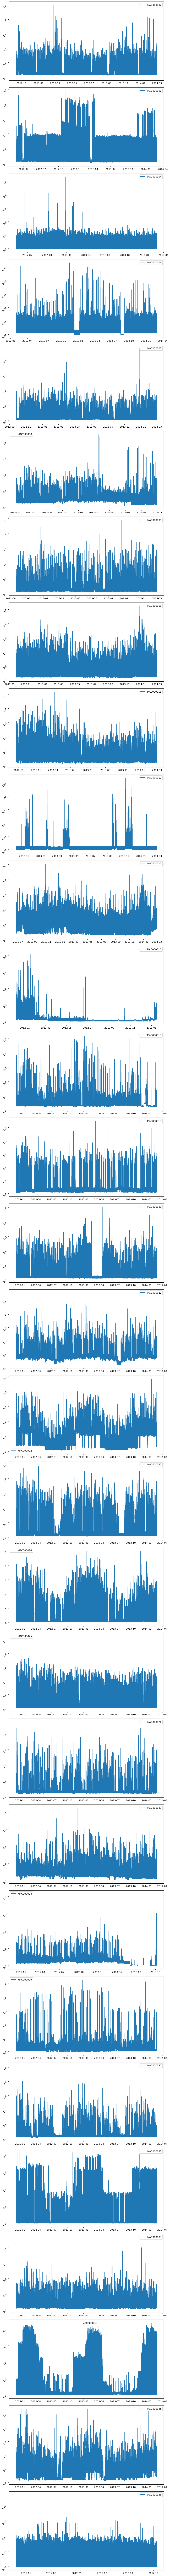

In [85]:
# Convert the 'DateTime' column to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Drop all rows that are ToU
df = df[df['stdorToU'] == 'Std']

# Set the 'DateTime' column as the index
df.set_index('DateTime', inplace=True)

# Convert the 'KWH' column to numeric
df['KWH'] = pd.to_numeric(df['KWH'], errors='coerce')

# Group the data by the 'LCLid' column
groups = df.groupby('LCLid')

# Create a new figure and a set of subplots
fig, axs = plt.subplots(len(groups), 1, figsize=(10, 5*len(groups)))

# Increase the space between subplots
plt.subplots_adjust(hspace=0.5)

# Plot each group separately
for ax, (name, group) in zip(axs, groups):
    ax.plot(group.index, group['KWH'], label=name)
    ax.legend()
    # Rotate the y-axis labels
    ax.tick_params(axis='y', rotation=45)
    # Set the y-axis limits
    # Reduce the number of y-axis ticks
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Show the plot
plt.tight_layout()
plt.show()

In [86]:
# Convert the 'DateTime' column to datetime
from matplotlib.ticker import MaxNLocator
df['DateTime'] = pd.to_datetime(df['DateTime'])

#drop all row that are Tou
df = df[df['stdorToU'] == 'Std']

# Set the 'DateTime' column as the index
df.set_index('DateTime', inplace=True)

# Convert the 'KWH' column to numeric
df['KWH'] = df['KWH'].astype(float, errors='ignore')

# Group the data by the 'LCLid' column
groups = df.groupby('LCLid')

# Create a new figure and a set of subplots
fig, axs = plt.subplots(len(groups), 1, figsize=(10, 5*len(groups)))

# Plot each group separately
for ax, (name, group) in zip(axs, groups):
    ax.plot(group.index, group['KWH'], label=name)
    ax.legend()
    # Rotate the y-axis labels
    ax.tick_params(axis='y', rotation=45)
    # Reduce the number of y-axis ticks
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
# Show the plot
plt.tight_layout()
plt.show()

KeyError: 'DateTime'